# 202131148_Alexandro Nesta

# IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MENAMPILKAN DATASET

In [2]:
dataset_fish = pd.read_csv('Fish.csv')
dataset_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# DROP DATA

In [3]:
dataset_fish = dataset_fish.drop(['Species', 'Weight','Length2','Length3','Width'], axis = 1)
dataset_fish

,Length1,Height
0,23.2,11.5200
1,24.0,12.4800
2,23.9,12.3778
3,26.3,12.7300
4,26.5,12.4440
...,...,...
154,11.5,2.0904
155,11.7,2.4300
156,12.1,2.2770
157,13.2,2.8728


# CLUSTERING

<function matplotlib.pyplot.show(close=None, block=None)>

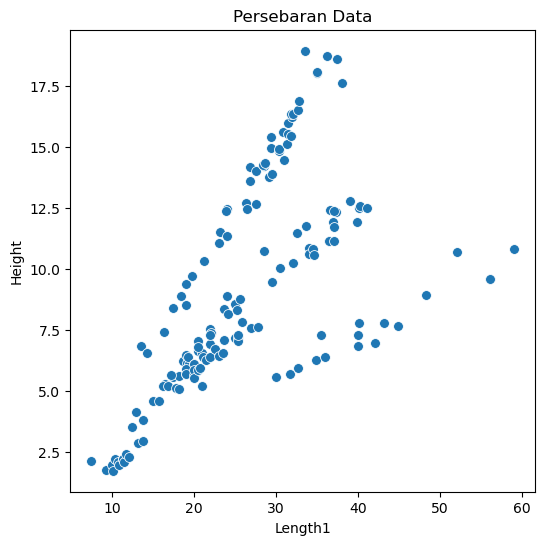

In [4]:
#Persebaran Data
plt.figure(figsize = (6,6))
sns.scatterplot(x ='Length1', y = 'Height', data = dataset_fish, s = 50)
plt.title('Persebaran Data')
plt.show

# ELBOW METHODE

In [5]:
# Hitung Within Cluster Sum Of Squared Error (WCSS) untuk setiap cluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
        kmModel = KMeans(n_clusters = i, n_init = 10)
        kmModel.fit(dataset_fish)
        wcss.append(kmModel.inertia_)

C:\Users\Nesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

<function matplotlib.pyplot.show(close=None, block=None)>

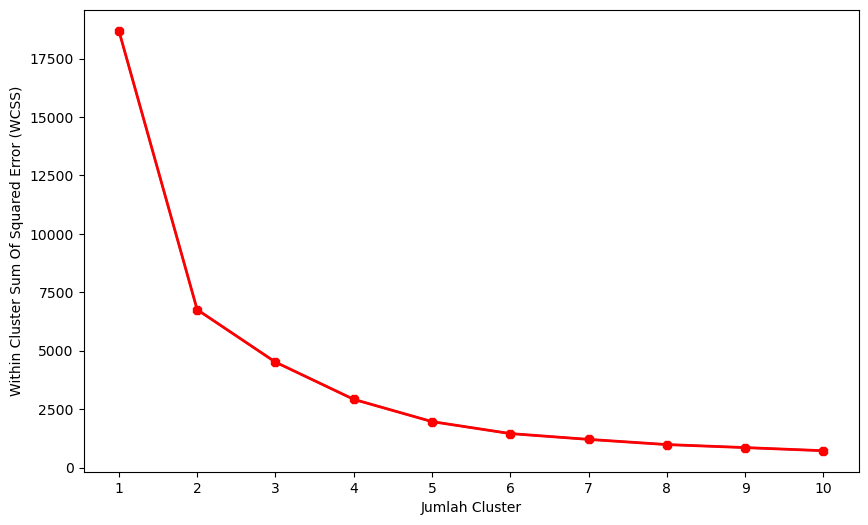

In [6]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('Jumlah Cluster')
plt.xticks(np.arange(1,11,1))
plt.ylabel('Within Cluster Sum Of Squared Error (WCSS)')
plt.show

In [7]:
#Model dengan 5 cluster

#n_init = 10 atau n_init = 'auto'
kmModelFix = KMeans(n_clusters = 3, n_init = 10)
kmModelFix.fit(dataset_fish)


C:\Users\Nesta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [8]:
#memprediksi Hasil
hasil_prediksi = kmModelFix.predict(dataset_fish)
hasil_prediksi

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [9]:
dataset_fish['Label'] = hasil_prediksi
dataset_fish.head()

,Length1,Height,Label
0,23.2,11.5200,2
1,24.0,12.4800,2
2,23.9,12.3778,2
3,26.3,12.7300,2
4,26.5,12.4440,2


<function matplotlib.pyplot.show(close=None, block=None)>

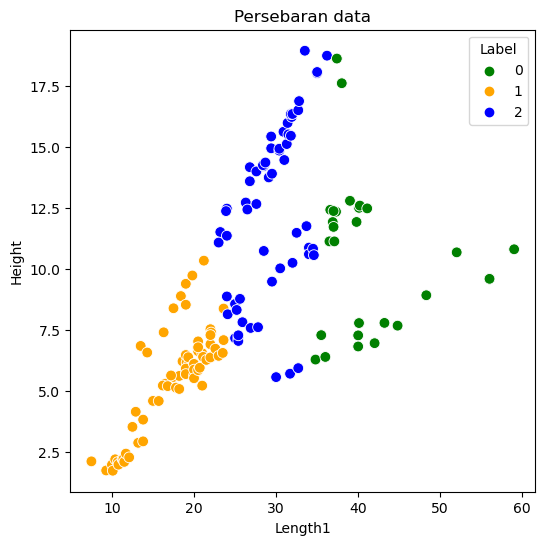

In [10]:
#Persebaran Data beserta Label nya
plt.figure(figsize = (6,6))
sns.scatterplot(x ='Length1', y = 'Height', hue ='Label',
                palette =['green','orange','blue'], legend = 'full', data = dataset_fish,
                s = 60)
plt.title('Persebaran data')
plt.show

In [ ]:
Kesimpulan :
    A. Label 0 adalah ikan dengan ukuran kecil
    B. Label 1 adalah ikan dengan ukuran sedang
    C. Label 2 adalah ikan dengan ukuran besar